In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
training_data = pd.read_csv('ISIC_2020_Training_GroundTruth_v2.csv')
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   lesion_id                      33126 non-null  object 
 3   sex                            33061 non-null  object 
 4   age_approx                     33058 non-null  float64
 5   anatom_site_general_challenge  32599 non-null  object 
 6   diagnosis                      33126 non-null  object 
 7   benign_malignant               33126 non-null  object 
 8   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ MB


### showing number of malignant vs benign lesions

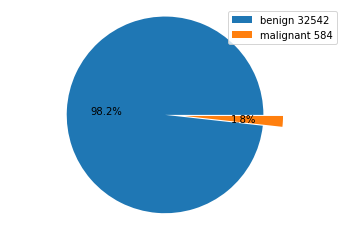

In [3]:
targets = training_data.groupby(['target'])['target'].count().to_numpy()
labels = [f'benign {targets[0]}', f'malignant {targets[1]}']
explode = [0, 0.2]

plt.pie(targets, autopct='%1.1f%%', startangle=0,  explode=explode)
plt.axis('equal')
plt.legend(labels=labels)
plt.show()

### counting the number of patients in dataset using patient_id

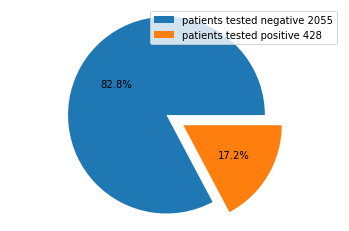

In [4]:
patients_tested_positive = training_data[training_data['target'] == 1 ].drop_duplicates(subset=['patient_id'])
patients_tested_negative = training_data[training_data['target'] == 0 ].drop_duplicates(subset=['patient_id'])

x = [patients_tested_negative['patient_id'].count(), patients_tested_positive['patient_id'].count()]
labels = [f'patients tested negative {x[0]}', f'patients tested positive {x[1]}']
explode = [0, 0.2]

plt.pie(x, autopct='%1.1f%%', startangle=0,  explode=explode)
plt.axis('equal')
plt.legend(labels=labels)
plt.show()

### female to male patients

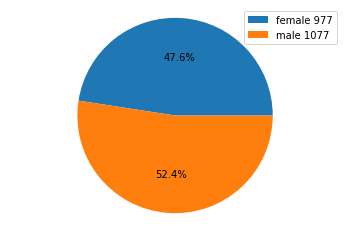

In [5]:
patients = training_data.drop_duplicates(subset=['patient_id'])
sex = patients.groupby(['sex'])['sex'].count().to_numpy()
labels = [f'female {sex[0]}', f'male {sex[1]}']

plt.pie(sex, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.legend(labels=labels)
plt.show()

### average number in images per patient

In [6]:
image_per_patient = training_data.groupby(['patient_id'])['patient_id'].count().to_numpy()
print(f'mean: {round(np.mean(image_per_patient))}, median: {int(np.median(image_per_patient))}, standard deviation: {round(np.std(image_per_patient))}')

mean: 16, median: 12, standard deviation: 16


### visualizing positive-tested patients approximate ages using density

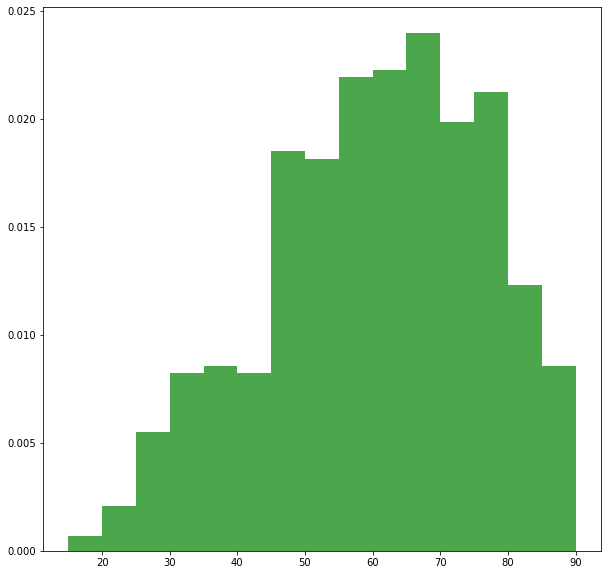

In [7]:
positive_patients_ages = training_data[training_data['target']  == 1 ]['age_approx'].to_numpy()

plt.figure(figsize = (10, 10))
plt.hist(positive_patients_ages, bins = 15, density = True, color = 'green', alpha = 0.7)
plt.show()

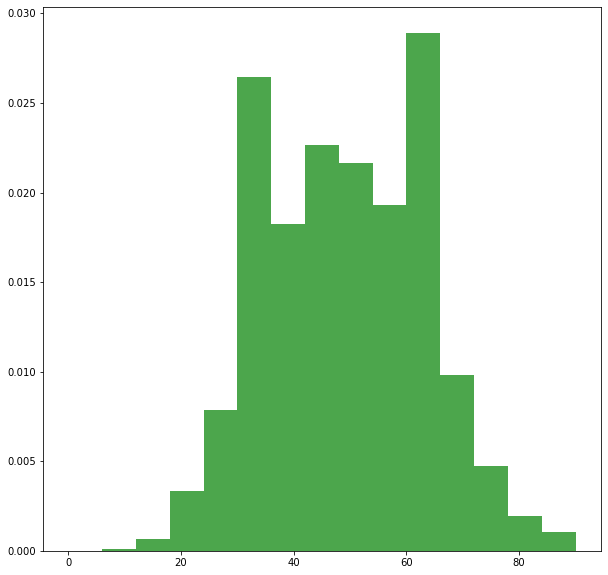

In [8]:
negative_patients_ages = training_data[training_data['target']  == 0 ]['age_approx'].to_numpy()

plt.figure(figsize = (10, 10))
plt.hist(negative_patients_ages, bins = 15, density = True, color ='green', alpha = 0.7)
plt.show()

### anatomical sites of lesions

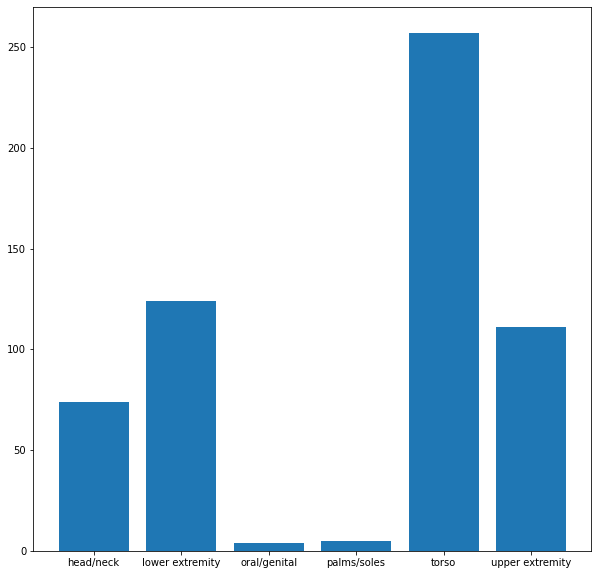

In [9]:
malignant = training_data[training_data['target']  == 1 ].groupby(['anatom_site_general_challenge'])['anatom_site_general_challenge'].count().to_dict()

plt.figure(figsize = (10, 10))
plt.bar(*zip(*malignant.items()))
plt.show()

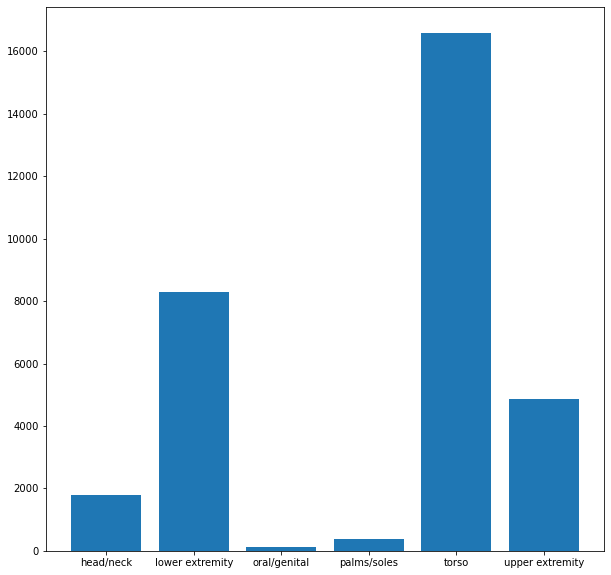

In [10]:
benign = training_data[training_data['target']  == 0 ].groupby(['anatom_site_general_challenge'])['anatom_site_general_challenge'].count().to_dict()

plt.figure(figsize = (10, 10))
plt.bar(*zip(*benign.items()))
plt.show()